# R linear model with the *diamonds* dataset

We demonstrate the use of the linear regression model (*lm()*) in R, using the large *diamonds* dataset.

In [187]:
library(ggplot2)

Here, carat = weight of the diamond. The [data dictionary](https://ggplot2.tidyverse.org/reference/diamonds.html) provides a reference for the other fields in the diamonds data frame.

It seems reasonable to suggest that the price of a diamond is dependent upon its weight (carat). Let's see if we can use linear regression to model this. We may need to use additional variables in our model, so let's look at them too.

In [188]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [232]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

Have a look at the data before we perform the fit:

In [189]:
# correlations among the variables:

cut=as.integer(diamonds$cut)
color=as.integer(diamonds$color)
clarity=as.integer(diamonds$clarity)

compare=data.frame(diamonds[c("price", "x", "y", "z","carat", "table", "depth")], cut, color, clarity)

cor(compare)

,price,x,y,z,carat,table,depth,cut,color,clarity
price,1.00000000,0.88443516,0.86542090,0.86124944,0.92159130,0.1271339,-0.01064740,-0.05349066,0.17251093,-0.14680007
x,0.88443516,1.00000000,0.97470148,0.97077180,0.97509423,0.1953443,-0.02528925,-0.12556524,0.27028669,-0.37199853
y,0.86542090,0.97470148,1.00000000,0.95200572,0.95172220,0.1837601,-0.02934067,-0.12146187,0.26358440,-0.35841962
z,0.86124944,0.97077180,0.95200572,1.00000000,0.95338738,0.1509287,0.09492388,-0.14932254,0.26822688,-0.36695200
carat,0.92159130,0.97509423,0.95172220,0.95338738,1.00000000,0.1816175,0.02822431,-0.13496702,0.29143675,-0.35284057
table,0.12713390,0.19534428,0.18376015,0.15092869,0.18161755,1.0000000,-0.29577852,-0.43340461,0.02646520,-0.16032684
depth,-0.01064740,-0.02528925,-0.02934067,0.09492388,0.02822431,-0.2957785,1.00000000,-0.21805501,0.04727923,-0.06738444
cut,-0.05349066,-0.12556524,-0.12146187,-0.14932254,-0.13496702,-0.4334046,-0.21805501,1.00000000,-0.02051852,0.18917474
color,0.17251093,0.27028669,0.26358440,0.26822688,0.29143675,0.0264652,0.04727923,-0.02051852,1.00000000,0.02563128
clarity,-0.14680007,-0.37199853,-0.35841962,-0.36695200,-0.35284057,-0.1603268,-0.06738444,0.18917474,0.02563128,1.00000000


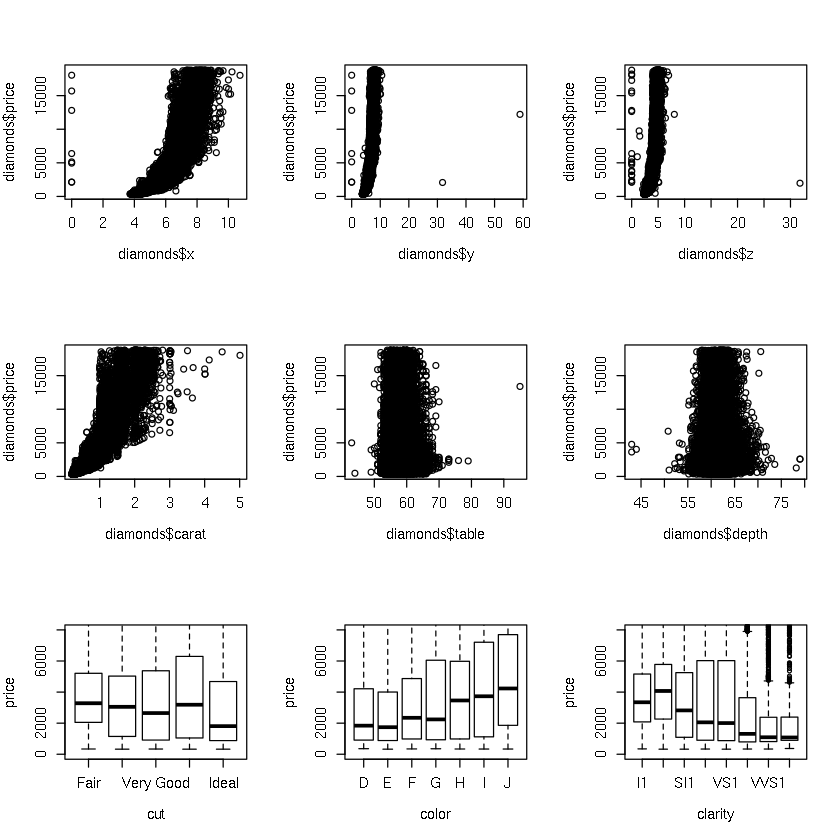

In [234]:
# Looking for relationships between data frame variables and diamond price.
# Offhand, the cut looks like a poor discriminator for price.

# Stack the plots in a grid with two rows and three columns
par(mfrow=c(3,3))

plot(diamonds$x, diamonds$price)
plot(diamonds$y, diamonds$price)
plot(diamonds$z, diamonds$price)
plot(diamonds$carat, diamonds$price)
plot(diamonds$table, diamonds$price)
plot(diamonds$depth, diamonds$price)

# note that an upper limit is made on the y axis (price) in order to see differences in the medians here:
plot(diamonds$cut, diamonds$price, xlab="cut", ylab="price", ylim=c(0, 8000))
plot(diamonds$color, diamonds$price, xlab="color", ylab="price", ylim=c(0, 8000))
plot(diamonds$clarity, diamonds$price, xlab="clarity", ylab="price", ylim=c(0, 8000))

# reset to default stacking
par(mfrow=c(1,1))

Let's posit that the price of the diamond depends on its weight (carats), as well as table and depth values. 

In [236]:
# Create a linear model of diamond values
#   DV = value, IVs = carat, table, depth

diamonds.lm <- lm(formula = price ~ carat + table + depth + as.integer(clarity),
                  data = diamonds)

What can we learn about the output of our lm() call?

In [237]:
# our output has class "lm"
class(diamonds.lm)

[1] "lm"

In [238]:
# overall:
summary(diamonds.lm)


Call:
lm(formula = price ~ carat + table + depth + as.integer(clarity), 
    data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-19386.4   -685.4   -105.0    571.5  10553.6 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4717.843    349.362   13.50   <2e-16 ***
carat               8402.497     13.144  639.29   <2e-16 ***
table                -58.719      2.781  -21.11   <2e-16 ***
depth                -98.087      4.252  -23.07   <2e-16 ***
as.integer(clarity)  479.114      3.782  126.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1340 on 53935 degrees of freedom
Multiple R-squared:  0.8872,	Adjusted R-squared:  0.8872 
F-statistic: 1.061e+05 on 4 and 53935 DF,  p-value: < 2.2e-16


In [239]:
# the coeffcients generated by the model:
coef(summary(diamonds.lm))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4717.84273,349.362463,13.50415,1.726776e-41
carat,8402.49748,13.143548,639.28687,0.000000e+00
table,-58.71867,2.781227,-21.11250,1.531950e-98
depth,-98.08711,4.252110,-23.06787,3.603487e-117
as.integer(clarity),479.11411,3.782054,126.68093,0.000000e+00


In [240]:
# names of the fields in the lm output data structure:
names(diamonds.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [241]:
# Coefficient statistics in the diamond model
summary(diamonds.lm)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4717.84273,349.362463,13.50415,1.726776e-41
carat,8402.49748,13.143548,639.28687,0.000000e+00
table,-58.71867,2.781227,-21.11250,1.531950e-98
depth,-98.08711,4.252110,-23.06787,3.603487e-117
as.integer(clarity),479.11411,3.782054,126.68093,0.000000e+00


In [242]:
# confidence interfals on the model
confint(diamonds.lm)

,2.5 %,97.5 %
(Intercept),4033.0895,5402.59594
carat,8376.7360,8428.25893
table,-64.1699,-53.26745
depth,-106.4213,-89.75294
as.integer(clarity),471.7013,486.52697


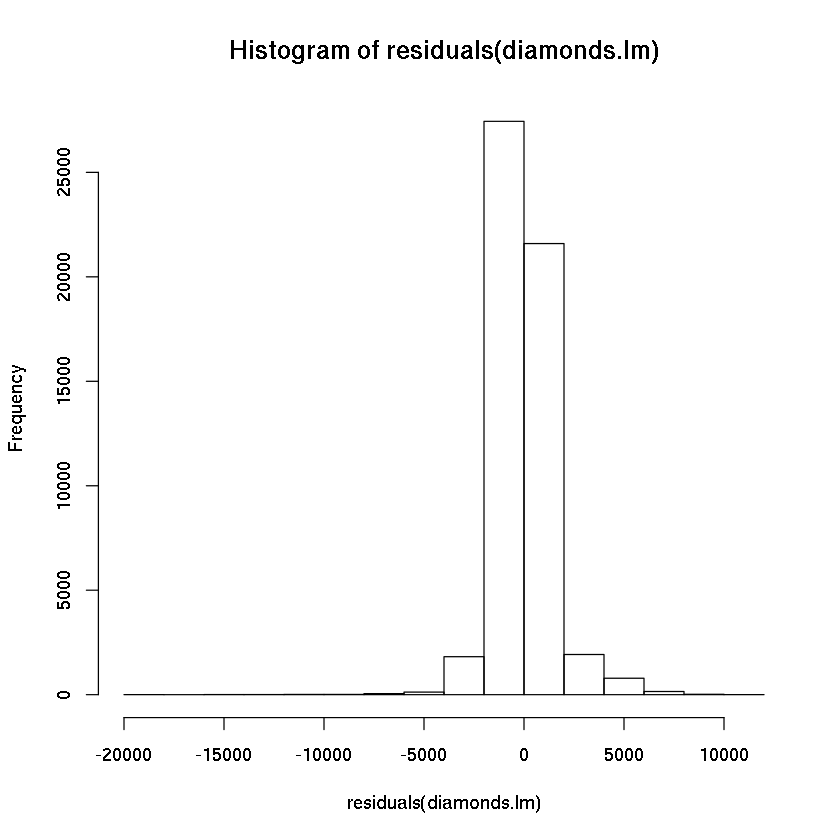

In [243]:
hist(residuals(diamonds.lm))

## Plotting model fitted.values

We can extract the diamond values predicted by our linear model, and attach them to a copy of the original dataframe for easy handling.

Here the modeled price is called *value.lm*. On quick examination, the predicted *value.lm* compared to the actual *price* is not so good:

In [244]:
# copy the dataframe for our own use
d <- diamonds

# Add the fitted values as a new column in the dataframe
d$value.lm <- diamonds.lm$fitted.values

# preview:
head(d)

carat,cut,color,clarity,depth,table,price,x,y,z,value.lm
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,-1653.2390
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,-1527.7388
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,-351.8828
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,-455.2954
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,-1333.7521
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,102.2918


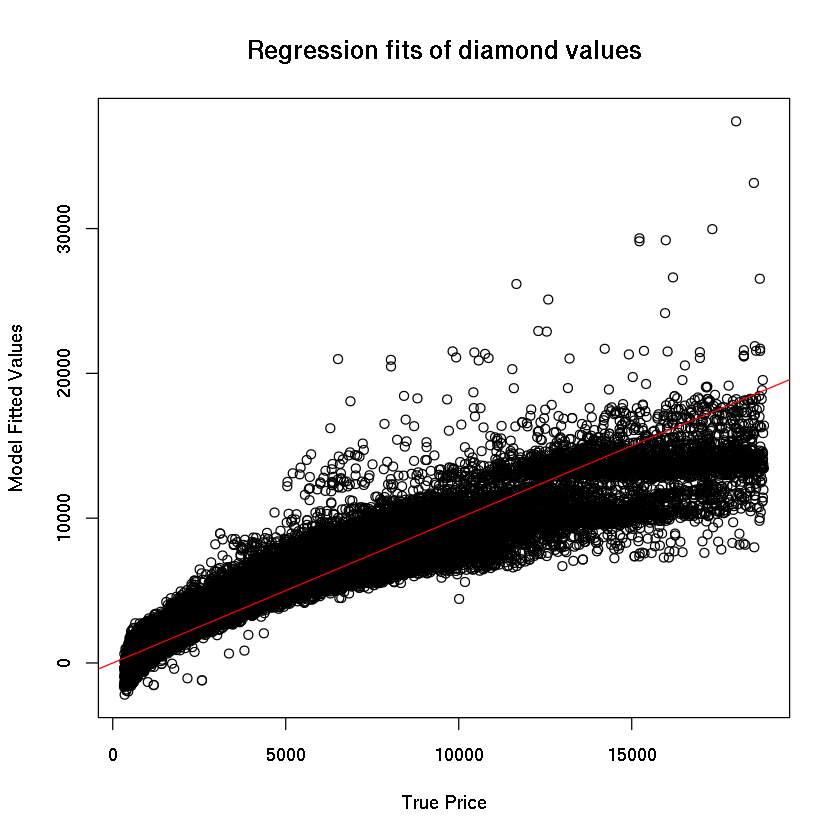

In [245]:
# Plot the relationship between true diamond price and linear model fitted values

plot(x = d$price,                  # True price on x-axis
     y = d$value.lm,               # fitted values on y-axis
     xlab = "True Price",
     ylab = "Model Fitted Values",
     main = "Regression fits of diamond values")

abline(b = 1, a = 0, col="red")                             # Values should fall around this line!

## Model residuals

Ordinary least squares regression relies on several assumptions, including that the residuals are normally distributed and homoscedastic, and the errors are independent and the relationships are linear. We can see from the fit above, and from the residuals, that we have done about as well as we can do with a linear model on these data. 

Investigate these assumptions visually by plotting model residuals:

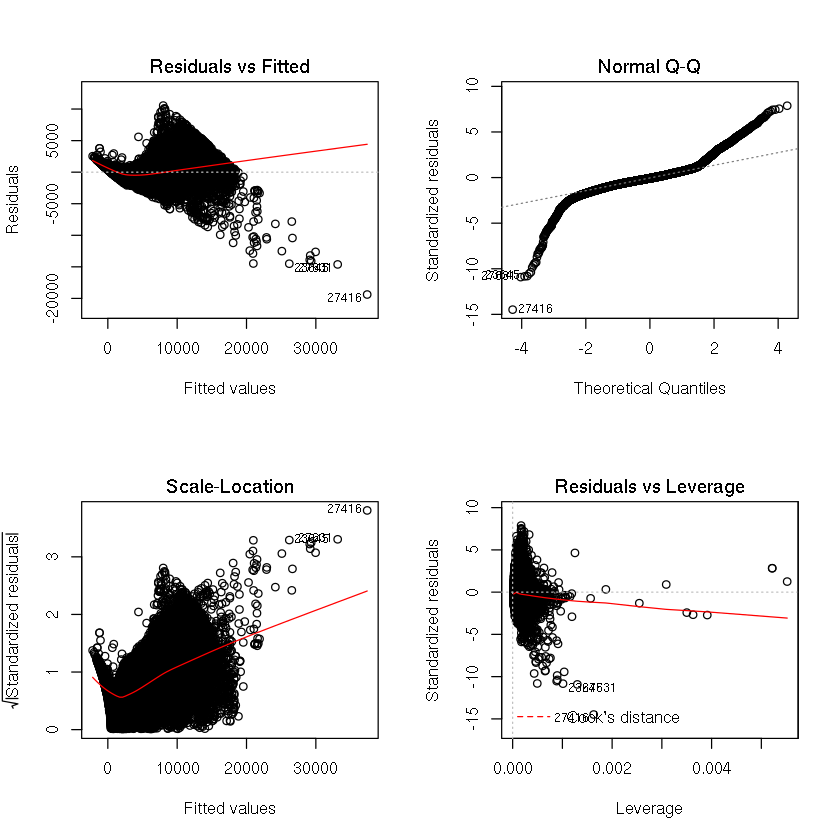

In [246]:
par(mfrow=c(2,2)) # Change the panel layout to 2 x 2
plot(diamonds.lm)
par(mfrow=c(1,1)) # Change back to 1 x 1

Can you improve the fit by including more variables? Or by using a different modeling function, such as glm() or rlm()? Do you conclude that we need an alternate analysis for this dataset?

Some references:

- [Simple linear models] (https://www.r-bloggers.com/r-tutorial-series-simple-linear-regression/)
- [Multiple regression] (https://www.statmethods.net/stats/regression.html)
- [R statistics tutorial] (https://tutorials.iq.harvard.edu/R/Rstatistics/Rstatistics.html)
- [Interpreting residuals] (https://data.library.virginia.edu/diagnostic-plots/)